Instalação de dependências

In [1]:
# !pip install pandas numpy matplotlib scikit-learn xgboost jinja2

Importação dos dados armazenados no banco de dados 
  - Inicialmente utilizando apenas ofertas da Apple
  - Cada captura corresponde a até 10 ofertas, sendo igualmente dividas entre compra e venda 
  - Cada oferta contém preço e volume, além de um tipo associado
  - Ask indica uma oferta de compra
  - Bid indica uma oferta de venda
  - As capturas também acompanham as melhores ofertas negociadas, mas esses dados não nos interessam por hora

In [2]:
import os
import pandas as pd
import numpy as np

input_path = os.path.join('df_final.csv')
df = pd.read_csv(input_path, parse_dates=["File_Date"])

df = df[df['Company'] == 'APPLE INC COM']
df = df[["File_Date", "Price_of_One_Share", "Transaction_type", "Number_of_Shares_Sold", "Time", "Company" ]]
df.head(10) #print

,File_Date,Price_of_One_Share,Transaction_type,Number_of_Shares_Sold,Time,Company
0,2024-07-10 12:21:57,230.90,asks,1.0,11:21:47,APPLE INC COM
1,2024-07-10 12:21:57,230.94,asks,1.0,11:21:49,APPLE INC COM
2,2024-07-10 12:21:57,230.92,bids,7.0,11:21:40,APPLE INC COM
3,2024-07-10 12:21:57,230.92,bids,5.0,11:21:40,APPLE INC COM
4,2024-07-10 12:21:57,230.92,bids,3.0,11:21:40,APPLE INC COM
5,2024-07-10 12:21:57,230.90,asks,400.0,11:21:47,APPLE INC COM
6,2024-07-10 12:21:57,230.91,bids,1.0,11:21:43,APPLE INC COM
7,2024-07-10 12:21:57,230.91,asks,52.0,11:21:47,APPLE INC COM
8,2024-07-10 12:21:57,230.91,asks,48.0,11:21:47,APPLE INC COM
9,2024-07-10 12:21:57,230.92,bids,1.0,11:21:40,APPLE INC COM


In [3]:
df["Company"] = df["Company"].str.split(" ").str[0]
df.head(10) #print

,File_Date,Price_of_One_Share,Transaction_type,Number_of_Shares_Sold,Time,Company
0,2024-07-10 12:21:57,230.90,asks,1.0,11:21:47,APPLE
1,2024-07-10 12:21:57,230.94,asks,1.0,11:21:49,APPLE
2,2024-07-10 12:21:57,230.92,bids,7.0,11:21:40,APPLE
3,2024-07-10 12:21:57,230.92,bids,5.0,11:21:40,APPLE
4,2024-07-10 12:21:57,230.92,bids,3.0,11:21:40,APPLE
5,2024-07-10 12:21:57,230.90,asks,400.0,11:21:47,APPLE
6,2024-07-10 12:21:57,230.91,bids,1.0,11:21:43,APPLE
7,2024-07-10 12:21:57,230.91,asks,52.0,11:21:47,APPLE
8,2024-07-10 12:21:57,230.91,asks,48.0,11:21:47,APPLE
9,2024-07-10 12:21:57,230.92,bids,1.0,11:21:40,APPLE


Renomeando as colunas
  - Os nomes simples facilitarão na hora de aplicar a janela deslizante

In [4]:
df = df.rename(columns={
    'File_Date': 'Fdate', 
    'Price_of_One_Share': 'P', 
    'Transaction_type': 'Type', 
    'Number_of_Shares_Sold': 'S',
    'Time': 'T'
})

df #print

,Fdate,P,Type,S,T,Company
0,2024-07-10 12:21:57,230.90,asks,1.0,11:21:47,APPLE
1,2024-07-10 12:21:57,230.94,asks,1.0,11:21:49,APPLE
2,2024-07-10 12:21:57,230.92,bids,7.0,11:21:40,APPLE
3,2024-07-10 12:21:57,230.92,bids,5.0,11:21:40,APPLE
4,2024-07-10 12:21:57,230.92,bids,3.0,11:21:40,APPLE
...,...,...,...,...,...,...
5751305,2024-10-18 18:00:02,235.03,bids,7.0,16:56:55,APPLE
5751306,2024-10-18 18:00:02,235.03,bids,1.0,16:56:43,APPLE
5751307,2024-10-18 18:00:02,235.03,bids,4.0,16:53:28,APPLE
5751308,2024-10-18 18:00:02,235.04,bids,1.0,16:52:12,APPLE


Eliminando capturas sem dados

In [5]:
df = df.dropna().reset_index(drop=True)
df #print

,Fdate,P,Type,S,T,Company
0,2024-07-10 12:21:57,230.90,asks,1.0,11:21:47,APPLE
1,2024-07-10 12:21:57,230.94,asks,1.0,11:21:49,APPLE
2,2024-07-10 12:21:57,230.92,bids,7.0,11:21:40,APPLE
3,2024-07-10 12:21:57,230.92,bids,5.0,11:21:40,APPLE
4,2024-07-10 12:21:57,230.92,bids,3.0,11:21:40,APPLE
...,...,...,...,...,...,...
302555,2024-10-18 18:00:02,235.03,bids,7.0,16:56:55,APPLE
302556,2024-10-18 18:00:02,235.03,bids,1.0,16:56:43,APPLE
302557,2024-10-18 18:00:02,235.03,bids,4.0,16:53:28,APPLE
302558,2024-10-18 18:00:02,235.04,bids,1.0,16:52:12,APPLE


Realizando ordenação por data de captura e tipo de oferta
  - Isso é essencial para agrupar posteriormente esses dados

In [6]:
# df = df.sort_values(by=['Fdate', 'Type'], ascending=[True, True]).reset_index(drop=True)
# df.head(11) #print

Unindo o horário de capturas iniciadas e finalizadas em momentos diferentes 
  - Todas as ofertas armazenarão o horário da captura, mesmo que tenham sido armazenadas segundos depois
  - A duração considerada é de até 5 segundos
  - A partir da duração considerada, qualquer oferta será associada a uma nova captura

In [7]:
df2 = df.copy()
threshold = 5 #segundos

df2['Fdate'] = pd.to_datetime(df2['Fdate'])
# Cria-se uma coluna "group" que identifica ofertas capturadas dentro de um intervalo de 5 segundos
# cumsum() garante que cada grupo tenha um valor único
df2['group'] = (df2['Fdate'] - df2['Fdate'].shift().fillna(df2['Fdate'].min())).dt.total_seconds().gt(threshold).cumsum()
# Todas as ofertas dentro de um mesmo grupo recebem a data da primeira oferta
df2['Fdate'] = df2.groupby('group').transform('first')['Fdate']
df2 = df2.drop('group', axis=1)

df2 #print

,Fdate,P,Type,S,T,Company
0,2024-07-10 12:21:57,230.90,asks,1.0,11:21:47,APPLE
1,2024-07-10 12:21:57,230.94,asks,1.0,11:21:49,APPLE
2,2024-07-10 12:21:57,230.92,bids,7.0,11:21:40,APPLE
3,2024-07-10 12:21:57,230.92,bids,5.0,11:21:40,APPLE
4,2024-07-10 12:21:57,230.92,bids,3.0,11:21:40,APPLE
...,...,...,...,...,...,...
302555,2024-10-18 18:00:02,235.03,bids,7.0,16:56:55,APPLE
302556,2024-10-18 18:00:02,235.03,bids,1.0,16:56:43,APPLE
302557,2024-10-18 18:00:02,235.03,bids,4.0,16:53:28,APPLE
302558,2024-10-18 18:00:02,235.04,bids,1.0,16:52:12,APPLE


Reordenam-se as transações para facilitar o treinamento do modelo

In [8]:
df2 = df2.set_index(['Fdate'])
df2['T'] = pd.to_datetime(df2['T'], format='%H:%M:%S').dt.time
df2 = df2.sort_values(by=['Fdate', 'T'], ascending=[True, False]).reset_index()

df2.head(15) #print

,Fdate,P,Type,S,T,Company
0,2024-07-10 12:21:57,230.94,asks,1.0,11:21:49,APPLE
1,2024-07-10 12:21:57,230.90,asks,1.0,11:21:47,APPLE
2,2024-07-10 12:21:57,230.90,asks,400.0,11:21:47,APPLE
3,2024-07-10 12:21:57,230.91,asks,52.0,11:21:47,APPLE
4,2024-07-10 12:21:57,230.91,asks,48.0,11:21:47,APPLE
5,2024-07-10 12:21:57,230.91,bids,1.0,11:21:43,APPLE
6,2024-07-10 12:21:57,230.92,bids,7.0,11:21:40,APPLE
7,2024-07-10 12:21:57,230.92,bids,5.0,11:21:40,APPLE
8,2024-07-10 12:21:57,230.92,bids,3.0,11:21:40,APPLE
9,2024-07-10 12:21:57,230.92,bids,1.0,11:21:40,APPLE


In [9]:
df2 = df2.drop('T', axis=1)

Para que as capturas sejam agrupadas por horário, precisamos ter diferentes níveis para cada tipo de oferta.
  - Haverão 5 níveis de ask e 5 níveis de bid por captura
  - Como cada nível terá um valor único na coluna "Type", poderemos usá-los como colunas
  - Teremos então preços e shares para cada nível, totalizando 20 colunas por captura
  - Os indivíduos do novo dataframe representarão cada captura

In [10]:
df2['N'] = df2.groupby(['Fdate', 'Type']).cumcount() + 1
df2['Type'] = df2['Type'].str[0] + '_' + df2['N'].astype('str')

df2 = df2.drop('N', axis=1)
print(df2.head(5)) #print
print(df2.tail(5)) #print

                Fdate       P Type      S Company
0 2024-07-10 12:21:57  230.94  a_1    1.0   APPLE
1 2024-07-10 12:21:57  230.90  a_2    1.0   APPLE
2 2024-07-10 12:21:57  230.90  a_3  400.0   APPLE
3 2024-07-10 12:21:57  230.91  a_4   52.0   APPLE
4 2024-07-10 12:21:57  230.91  a_5   48.0   APPLE
                     Fdate       P Type     S Company
302555 2024-10-18 18:00:02  235.03  b_1   7.0   APPLE
302556 2024-10-18 18:00:02  235.03  b_2   1.0   APPLE
302557 2024-10-18 18:00:02  235.03  b_3   4.0   APPLE
302558 2024-10-18 18:00:02  235.04  b_4   1.0   APPLE
302559 2024-10-18 18:00:02  235.04  b_5  61.0   APPLE


In [11]:
df2 = df2.pivot(columns='Type', index='Fdate', values=['P', 'S'])
df2 #print


P                                                    \
Type                    a_1      a_2      a_3     a_4     a_5     b_1     b_2   
Fdate                                                                           
2024-07-10 12:21:57  230.94  230.900  230.900  230.91  230.91  230.91  230.92   
2024-07-10 12:23:02  230.87  230.870  230.870  230.87  230.88  230.88  230.88   
2024-07-10 12:25:41  230.85  230.850  230.850  230.85  230.85  230.85  230.85   
2024-07-10 12:26:37  230.94  230.930  230.935  230.96  230.96  230.91  230.91   
2024-07-10 12:27:32  230.95  230.935  230.920  230.92  230.93  230.91  230.91   
...                     ...      ...      ...     ...     ...     ...     ...   
2024-10-18 17:56:19  235.03  235.040  235.040  235.04  235.04  235.04  235.04   
2024-10-18 17:57:15  235.03  235.030  235.030  235.03  235.03  235.04  235.04   
2024-10-18 17:58:11  235.03  235.030  235.030  235.03  235.03  235.03  235.03   
2024-10-18 17:59:06  235.02  235.030  235.030  235.03  235.03  235.03  235.03   
2024-10-18 18:00:02  235.02  235.030  235.030  235.03  235.03  235.03  235.03   

                                                 S                             \
Type                    b_3     b_4     b_5    a_1    a_2    a_3    a_4   a_5   
Fdate                                                                           
2024-07-10 12:21:57  230.92  230.92  230.92    1.0    1.0  400.0   52.0  48.0   
2024-07-10 12:23:02  230.88  230.88  230.88  500.0   10.0  690.0  610.0  52.0   
2024-07-10 12:25:41  230.85  230.85  230.87  100.0  100.0  100.0   73.0  27.0   
2024-07-10 12:26:37  230.92  230.95  230.93   10.0    1.0    3.0  100.0   2.0   
2024-07-10 12:27:32  230.91  230.91  230.91    1.0    2.0  100.0    5.0  10.0   
...                     ...     ...     ...    ...    ...    ...    ...   ...   
2024-10-18 17:56:19  235.04  235.04  235.04    4.0    1.0   61.0    2.0  60.0   
2024-10-18 17:57:15  235.04  235.04  235.04    1.0    1.0    7.0    1.0   4.0   
2024-10-18 17:58:11  235.04  235.04  235.04   19.0    1.0    1.0    1.0   7.0   
2024-10-18 17:59:06  235.03  235.04  235.04    1.0   19.0    1.0    1.0   1.0   
2024-10-18 18:00:02  235.03  235.04  235.04    1.0   19.0    1.0    1.0   1.0   

                                                        
Type                  b_1    b_2    b_3    b_4     b_5  
Fdate                                                   
2024-07-10 12:21:57   1.0    7.0    5.0    3.0     1.0  
2024-07-10 12:23:02  25.0   23.0    3.0  100.0   100.0  
2024-07-10 12:25:41  59.0  100.0   34.0  100.0   100.0  
2024-07-10 12:26:37   6.0   21.0   44.0   32.0     4.0  
2024-07-10 12:27:32  50.0    1.0   92.0  100.0   100.0  
...                   ...    ...    ...    ...     ...  
2024-10-18 17:56:19   1.0   50.0  100.0   37.0  1089.0  
2024-10-18 17:57:15   1.0   61.0    2.0   60.0     1.0  
2024-10-18 17:58:11   1.0    4.0    1.0   61.0     2.0  
2024-10-18 17:59:06   7.0    1.0    4.0    1.0    61.0  
2024-10-18 18:00:02   7.0    1.0    4.0    1.0    61.0  

[30256 rows x 20 columns]

Eliminando capturas duplicadas

O scrapper continua funcionando após fechamento da bolsa, o que provoca capturas novas com os mesmos dados repetidamente, isso gera um viés no modelo.
Para corrigir o problema, eliminamos capturas duplicadas

In [12]:
# delete duplicated entries
df2 = df2.drop_duplicates()

Verificando que não há informações faltantes.<br>
Capturas com menos ofertas possuiriam valores faltantes (NaN), o que não ocorre.  

In [13]:
df2[df2.isna().any(axis=1)] #print

Empty DataFrame
Columns: [(P, a_1), (P, a_2), (P, a_3), (P, a_4), (P, a_5), (P, b_1), (P, b_2), (P, b_3), (P, b_4), (P, b_5), (S, a_1), (S, a_2), (S, a_3), (S, a_4), (S, a_5), (S, b_1), (S, b_2), (S, b_3), (S, b_4), (S, b_5)]
Index: []

Os multi-índices são planificados para facilitar a manipulação dos dados

In [14]:
df2.columns = [''.join(col) for col in df2.columns]
df2.head(10) #print

,Pa_1,Pa_2,Pa_3,Pa_4,Pa_5,Pb_1,Pb_2,Pb_3,Pb_4,Pb_5,Sa_1,Sa_2,Sa_3,Sa_4,Sa_5,Sb_1,Sb_2,Sb_3,Sb_4,Sb_5
Fdate,,,,,,,,,,,,,,,,,,,,
2024-07-10 12:21:57,230.94,230.900,230.900,230.91,230.91,230.91,230.92,230.92,230.92,230.92,1.0,1.0,400.0,52.0,48.0,1.0,7.0,5.0,3.0,1.0
2024-07-10 12:23:02,230.87,230.870,230.870,230.87,230.88,230.88,230.88,230.88,230.88,230.88,500.0,10.0,690.0,610.0,52.0,25.0,23.0,3.0,100.0,100.0
2024-07-10 12:25:41,230.85,230.850,230.850,230.85,230.85,230.85,230.85,230.85,230.85,230.87,100.0,100.0,100.0,73.0,27.0,59.0,100.0,34.0,100.0,100.0
2024-07-10 12:26:37,230.94,230.930,230.935,230.96,230.96,230.91,230.91,230.92,230.95,230.93,10.0,1.0,3.0,100.0,2.0,6.0,21.0,44.0,32.0,4.0
2024-07-10 12:27:32,230.95,230.935,230.920,230.92,230.93,230.91,230.91,230.91,230.91,230.91,1.0,2.0,100.0,5.0,10.0,50.0,1.0,92.0,100.0,100.0
2024-07-10 12:28:28,231.00,231.000,230.945,230.96,230.97,230.97,230.97,230.98,231.01,231.01,100.0,100.0,1.0,100.0,100.0,200.0,200.0,10.0,200.0,2.0
2024-07-10 12:29:25,231.00,230.980,230.980,230.97,230.99,230.98,230.98,230.98,230.97,230.97,100.0,100.0,4.0,100.0,100.0,7.0,200.0,5.0,88.0,12.0
2024-07-10 12:30:26,231.04,231.050,231.050,231.05,231.06,231.05,231.05,231.06,231.06,231.06,100.0,41.0,16.0,100.0,26.0,100.0,10.0,10.0,10.0,90.0
2024-07-10 12:31:22,231.25,231.210,231.210,231.20,231.20,231.20,231.22,231.25,231.25,231.24,200.0,10.0,12.0,3.0,100.0,100.0,100.0,19.0,74.0,100.0


In [15]:
df2.to_csv('df_20_dados_fdate.csv')

Finalmente, aplica-se a janela deslizante nas capturas de ofertas
  - Cada linha do dataframe resultante contém X observações de ofertas anteriores, a observação atual e a próxima observação
  - A janela será igual a X + 1 = 3, de forma que 1 é logicamente o tamanho mínimo da janela

In [16]:
def get_renamed_df(df, i):
    df.columns = [f'{col}-{i}' for col in df.columns]
    return df

window = 3
df_lag = get_renamed_df(df2.copy(), 0)

for i in range(1, window):
  temp_df = get_renamed_df(df2.copy().shift(i), i)
  df_lag = pd.concat([df_lag, temp_df], axis=1)

temp_df = df2.copy().shift(-1)
df_lag = pd.concat([df_lag, temp_df], axis=1)

df_lag = df_lag.dropna()
df_lag.columns #print

Index(['Pa_1-0', 'Pa_2-0', 'Pa_3-0', 'Pa_4-0', 'Pa_5-0', 'Pb_1-0', 'Pb_2-0',
       'Pb_3-0', 'Pb_4-0', 'Pb_5-0', 'Sa_1-0', 'Sa_2-0', 'Sa_3-0', 'Sa_4-0',
       'Sa_5-0', 'Sb_1-0', 'Sb_2-0', 'Sb_3-0', 'Sb_4-0', 'Sb_5-0', 'Pa_1-1',
       'Pa_2-1', 'Pa_3-1', 'Pa_4-1', 'Pa_5-1', 'Pb_1-1', 'Pb_2-1', 'Pb_3-1',
       'Pb_4-1', 'Pb_5-1', 'Sa_1-1', 'Sa_2-1', 'Sa_3-1', 'Sa_4-1', 'Sa_5-1',
       'Sb_1-1', 'Sb_2-1', 'Sb_3-1', 'Sb_4-1', 'Sb_5-1', 'Pa_1-2', 'Pa_2-2',
       'Pa_3-2', 'Pa_4-2', 'Pa_5-2', 'Pb_1-2', 'Pb_2-2', 'Pb_3-2', 'Pb_4-2',
       'Pb_5-2', 'Sa_1-2', 'Sa_2-2', 'Sa_3-2', 'Sa_4-2', 'Sa_5-2', 'Sb_1-2',
       'Sb_2-2', 'Sb_3-2', 'Sb_4-2', 'Sb_5-2', 'Pa_1', 'Pa_2', 'Pa_3', 'Pa_4',
       'Pa_5', 'Pb_1', 'Pb_2', 'Pb_3', 'Pb_4', 'Pb_5', 'Sa_1', 'Sa_2', 'Sa_3',
       'Sa_4', 'Sa_5', 'Sb_1', 'Sb_2', 'Sb_3', 'Sb_4', 'Sb_5'],
      dtype='object')

In [17]:
# count df_lag rows
print(len(df_lag.index)) #print

28572


Treinamento do modelo
  - Utiliza-se XGBoost para prever os preços e volumes de cada nível de asks e bids
  - A previsão é do tipo multioutput, ou seja, teremos 20 saídas para cada observação
  - A proporção entre os conjuntos de treino e teste é de 4:1
  - As métricas de avaliação são o R2 (coeficiente de determinação) e o RMSE (raiz do erro quadrático médio)

In [18]:
import xgboost as xgb
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_percentage_error, mean_absolute_error
from sklearn.model_selection import train_test_split

# train_size = int(len(df_lag)*0.8)
# train = df_lag[:train_size]
# test = df_lag[train_size:]

target_variables = [col for col in df_lag.columns if len(col) == 4]
features = [col for col in df_lag.columns if col not in target_variables]

X_train, X_test, y_train, y_test = train_test_split(
    df_lag[features],
    df_lag[target_variables],
    test_size=0.2,
    random_state=42
)

# X_train = train[features]
# y_train = train[target_variables]
# X_test = test[features]
# y_test = test[target_variables]

model = xgb.XGBRegressor()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred, multioutput='raw_values')
mape = mean_absolute_percentage_error(y_test, y_pred, multioutput='raw_values')
mae = mean_absolute_error(y_test, y_pred, multioutput='raw_values')
mse = mean_squared_error(y_test, y_pred, multioutput='raw_values')
rmse = np.sqrt(mean_squared_error(y_test, y_pred, multioutput='raw_values'))


Impressão dos resultados

In [19]:
results = pd.DataFrame({
    'MAE': mae,
    'MAPE': mape,
    'MSE': mse,
    'RMSE': rmse,
    'R2': r2,
}, index=y_test.columns)

results #print

,MAE,MAPE,MSE,RMSE,R2
Pa_1,0.137980,0.000622,0.074417,0.272795,0.997875
Pa_2,0.134544,0.000607,0.075153,0.274140,0.997854
Pa_3,0.135565,0.000611,0.081210,0.284974,0.997682
Pa_4,0.133743,0.000603,0.078167,0.279583,0.997768
Pa_5,0.135041,0.000609,0.078589,0.280338,0.997756
Pb_1,0.134903,0.000608,0.083438,0.288856,0.997619
Pb_2,0.133908,0.000603,0.076554,0.276683,0.997814
Pb_3,0.134855,0.000608,0.075995,0.275672,0.997830
Pb_4,0.133353,0.000601,0.074560,0.273056,0.997872
Pb_5,0.132409,0.000597,0.070859,0.266193,0.997977


In [20]:
print(results.to_latex()) #print

\begin{tabular}{lrrrrr}
\toprule
 & MAE & MAPE & MSE & RMSE & R2 \\
\midrule
Pa_1 & 0.137980 & 0.000622 & 0.074417 & 0.272795 & 0.997875 \\
Pa_2 & 0.134544 & 0.000607 & 0.075153 & 0.274140 & 0.997854 \\
Pa_3 & 0.135565 & 0.000611 & 0.081210 & 0.284974 & 0.997682 \\
Pa_4 & 0.133743 & 0.000603 & 0.078167 & 0.279583 & 0.997768 \\
Pa_5 & 0.135041 & 0.000609 & 0.078589 & 0.280338 & 0.997756 \\
Pb_1 & 0.134903 & 0.000608 & 0.083438 & 0.288856 & 0.997619 \\
Pb_2 & 0.133908 & 0.000603 & 0.076554 & 0.276683 & 0.997814 \\
Pb_3 & 0.134855 & 0.000608 & 0.075995 & 0.275672 & 0.997830 \\
Pb_4 & 0.133353 & 0.000601 & 0.074560 & 0.273056 & 0.997872 \\
Pb_5 & 0.132409 & 0.000597 & 0.070859 & 0.266193 & 0.997977 \\
Sa_1 & 56.644897 & 10.664654 & 10616.787109 & 103.037796 & -0.138583 \\
Sa_2 & 59.504704 & 10.341868 & 16582.570312 & 128.773331 & -0.220375 \\
Sa_3 & 62.410637 & 10.230619 & 21230.357422 & 145.706406 & -0.127102 \\
Sa_4 & 63.985214 & 10.279444 & 21367.951172 & 146.177811 & -0.154583 \\
Sa_5 

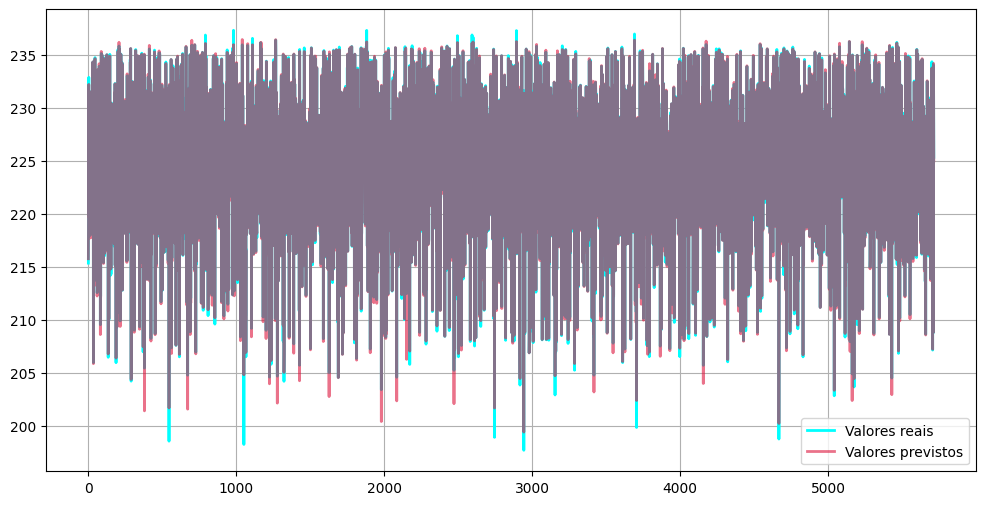

In [21]:
import matplotlib.pyplot as plt

def plot_graph(column):
    x = range(len(y_test))
    plt.figure(figsize=(12, 6))
    plt.tight_layout()

    pred_index = y_test.columns.get_loc(column)

    plt.plot(x, y_test[column], label='Valores reais', alpha=1, lw=2, color='cyan')
    plt.plot(x, y_pred[:, pred_index], label='Valores previstos', alpha=0.6, lw=2, color='crimson')
    # plt.title(f'Gráfico de valores reais × previstos para {column}')

    plt.legend()
    plt.grid(True)
    plt.show()

plot_graph('Pa_5') #print

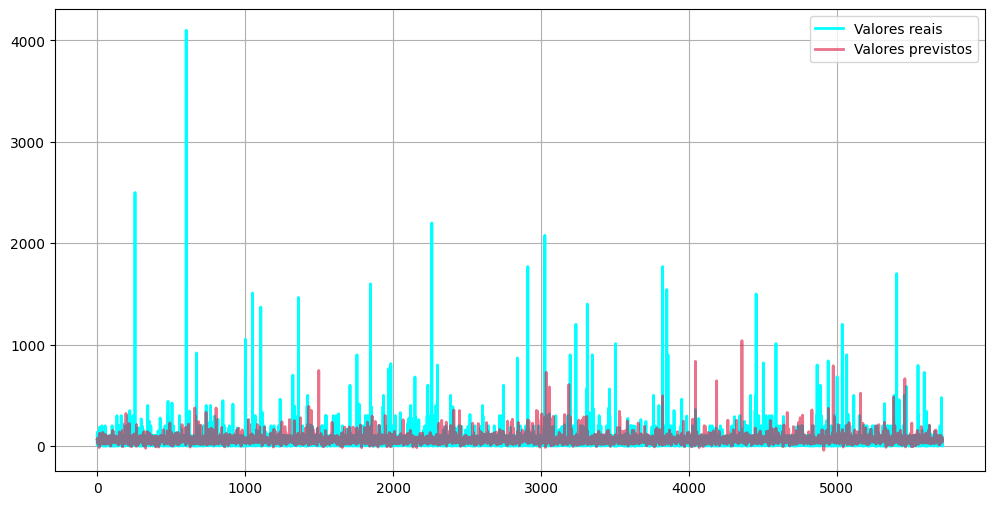

In [22]:
plot_graph('Sa_5') #print